# **# Brief description of the problem and data**
# 
This notebook is based on the data from the kaggle competition: Natural Language Processing with Disaster Tweets.

Problem:

In this competition, you’re challenged to build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t. You’ll have access to a dataset of 10,000 tweets that were hand classified.

Data:

Each sample in the train and test set has the following information:

	 id - a unique identifier for each tweet

	 text - the text of the tweet

	 location - the location the tweet was sent from (may be blank)

	 keyword - a particular keyword from the tweet (may be blank)

	 target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)

# Division of this Notebook:

This notebook is split into 4 sections

PART 1: Reading DATA

PART 2: EDA --> Visualization of the text including word count 

PART 3: PREPROCESSING THE DATA SO THAT IT CAN BE USED IN OUR MODEL

PART 4: BUILDING AND VALIDATING OUR MODEL

# Methodology

This methodology involves data preprocessing, tokenization, model architecture design, model training, prediction, and evaluation. Here I am leveraging the power of LSTM and GRU models to capture sequential information and make predictions on text data.
The steps and methodology used for the LSTM and GRU models are as follows:

1. Data Preprocessing: The first step is to preprocess the text data by removing unnecessary characters, converting text to lowercase, removing stopwords, and applying any other required text cleaning techniques. This helps in standardizing the input data and reducing noise.

2. Tokenization: Next, the preprocessed text is tokenized, which involves splitting the text into individual words or tokens. This step helps in converting the textual data into a numerical representation that can be understood by the model.

3. Sequence Padding: To ensure that all input sequences have the same length, padding is applied. In this step, sequences are either truncated or padded with zeros to match the desired sequence length. This is necessary for creating fixed-size input tensors for the models.

4. Model Architecture: The models used in this scenario are LSTM and GRU, which are recurrent neural network (RNN) variants specifically designed for sequential data processing. 
    Both models have an embedding layer as the first layer, which learns the word embeddings for the input tokens. This is followed by one or more LSTM or GRU layers, which capture the sequential dependencies in the data. Finally, a dense layer with a sigmoid activation function is used for     binary classification.

5. Compilation and Training: The models are compiled with the appropriate loss function, optimizer, and evaluation metric. In this case, binary cross-entropy loss is used as it is suitable for binary classification tasks. The models are then trained on the training data using the `fit` function. The number of epochs and batch size can be adjusted based on the dataset and computational resources. Here I saw that if I increase the epoch in GRU the model preiction improved to 77%.

6. Prediction: Once the models are trained, they can be used to make predictions on new, unseen data. The `predict` function is used to obtain the predicted probabilities for each class. These probabilities can be thresholded (e.g., using 0.5) to obtain the predicted classes (0 or 1).

7. Evaluation: To evaluate the performance of the models, a confusion matrix is computed using the true labels and predicted labels. The confusion matrix provides insights into the number of true positives, true negatives, false positives, and false negatives. Additionally, a heatmap visualization is created using the `sns.heatmap` function to make the confusion matrix more interpretable.



# Importing All the required libraries 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
print(tf.__version__)
import tensorflow_hub as hub
import keras_tuner as kt
import tensorflow_text as tf_text
import requests
from pathlib import Path
import nltk
from nltk import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('omw-1.4')
nltk.download("wordnet")
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import subprocess
import re
from sklearn import metrics
import warnings
import string
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.layers import Embedding, Dense, LSTM, GRU


# Now you can import the NLTK resources as usual
from nltk.corpus import wordnet


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

2.12.0
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Use this code when we get nltk error while lematizing the text

In [ ]:

# try:
#     nltk.data.find('wordnet.zip')
# except:
#     nltk.download('wordnet', download_dir='/kaggle/working/')
#     command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
#     subprocess.run(command.split())
#     nltk.data.path.append('/kaggle/working/')

# # Now you can import the NLTK resources as usual
# from nltk.corpus import wordnet

# Reading the files

In [2]:
train_tweetz = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test_tweetz = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

# Displaying the text

In [3]:
train_tweetz.head().style.background_gradient(cmap='coolwarm')

,id,keyword,location,text,target
0,1,nan,nan,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,nan,nan,Forest fire near La Ronge Sask. Canada,1
2,5,nan,nan,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,nan,nan,"13,000 people receive #wildfires evacuation orders in California",1
4,7,nan,nan,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [4]:
test_tweetz.head().style.background_gradient(cmap='coolwarm')

,id,keyword,location,text
0,0,nan,nan,Just happened a terrible car crash
1,2,nan,nan,"Heard about #earthquake is different cities, stay safe everyone."
2,3,nan,nan,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"
3,9,nan,nan,Apocalypse lighting. #Spokane #wildfires
4,11,nan,nan,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
print("Training set Null Counts: \n",train_tweetz.isnull().sum())
print("Training set Null Counts: \n",test_tweetz.isnull().sum())

Training set Null Counts: 
 id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
Training set Null Counts: 
 id             0
keyword       26
location    1105
text           0
dtype: int64


# Visualization of Word Count and Character count 

Creating a New DF just to show word and character count before the processing of text:

In [6]:
newdf_train = train_tweetz.copy()
newdf_train['word count'] = train_tweetz['text'].apply(lambda row: len(row.split()))
newdf_train['char count'] = train_tweetz['text'].apply(lambda row: len(row))
newdf_train['word count'] = test_tweetz['text'].apply(lambda row: len(row.split()))
newdf_train['char count'] = test_tweetz['text'].apply(lambda row: len(row))

In [7]:
## Here I am making 2 helper functions that will take text and type of plot that is needed
def plotter(train,grah_plot):
    if grah_plot == 'Word Count':

        
        ax2 = sns.displot(
            data = train,
            x = 'word count',
            hue = 'target',
            palette = 'colorblind',
            kde = True,
            alpha = 0.6,
            legend = True,
            ).set(
                title = 'Train set: Text length by Target (# of characterts before cleaning)');
    elif grah_plot == 'Char Count':

        
        ax2 = sns.displot(
            data = train,
            x = 'char count',
            hue = 'target',
            palette = 'colorblind',
            kde = True,
            alpha = 0.6,
            legend = True,
            ).set(
                title = 'Train set: Text length by Target (# of characterts before cleaning)');

        
    elif grah_plot == 'Category':
        

        train['Category'].value_counts()[train['Category'].unique()].plot.barh(stacked=True)

    else:


        plt.pie(train['target'].value_counts(), labels=["No Disaster","Disaster"],autopct="%.3f%%")
        
## This helper function shows the top 50 disastrous and non-disastrous tweets
def ploty(disaster,nondisaster):
    fig, ax = plt.subplots(1,2, figsize=(50,8))
    sns.barplot(y=disaster[0:50].index, x=disaster[0:50], orient='h', ax=ax[0], palette="Reds_d")
    ax[0].set_title("Top 50 Keywords - Disaster Tweets")
    ax[0].set_xlabel("Keyword Frequency")

    sns.barplot(y=nondisaster[0:50].index, x=nondisaster[0:50], orient='h', ax=ax[1], palette="Blues_d")
    ax[1].set_title("Top 50 Keywords - Non-Disaster Tweets")
    ax[1].set_xlabel("Keyword Frequency")


    plt.tight_layout()
    plt.show()

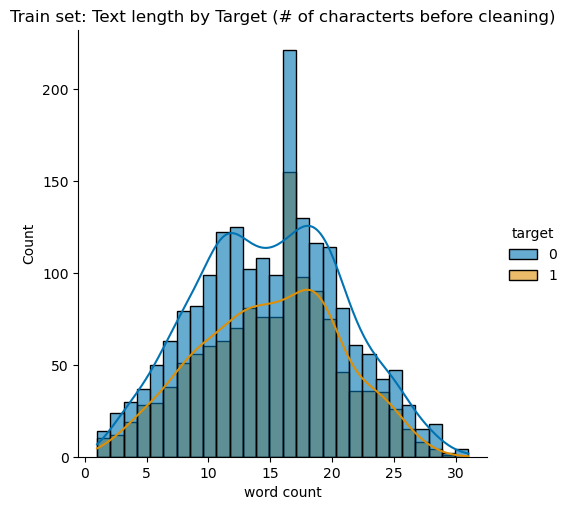

In [8]:
plotter(newdf_train,'Word Count')

In [9]:
disaster = train_tweetz.loc[train_tweetz["target"] == 1]["keyword"].value_counts()
nondisaster =train_tweetz.loc[train_tweetz["target"] == 0]["keyword"].value_counts()


top_disaster_keyword = train_tweetz.groupby('keyword').mean()['target'].sort_values(ascending = False).head(20)
top_nondisaster_keyword = train_tweetz.groupby('keyword').mean()['target'].sort_values().head(20)

# Pre Processing the Text 

Here I will be removing all the punctuations, url and stop words

The given function preprocess_text performs several text preprocessing steps. Here's an explanation of each step:

   Remove URLs: The function uses regular expressions (re.sub()) to remove any URLs from the text. It searches for patterns starting with "http://", "www.", or "https://" and replaces them with an empty string.

   Remove punctuations and emojis: The translate() method is used to remove all punctuation marks from the text. It creates a translation table using string.punctuation and applies it to remove all punctuations. Then, the encode() and decode() methods are used to remove any non-ASCII characters (emojis) from the text.

   Tokenize text into words: The word_tokenize() function from the nltk library is used to split the text into individual words or tokens.

   Remove stop words: The function removes common stop words (e.g., "and", "the", "is") from the tokenized text. It uses the stopwords.words('english') function from the nltk library to get a set of English stop words. It then filters out any tokens that are in the stop words set.

   Join the tokens back into a single text: Finally, the function joins the filtered tokens back into a single text using the ' '.join(filtered_tokens) operation. This returns the processed text, where URLs, punctuations, emojis, and stop words have been removed.

Overall, this function is useful for cleaning and preprocessing text data by removing unwanted elements and reducing noise, making the text ready for further analysis or modeling tasks.

In [10]:
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove punctuations and emojis
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.encode('ascii', 'ignore').decode('ascii')

    # Tokenize text into words
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    # Join the tokens back into a single text
    processed_text = ' '.join(filtered_tokens)

    return processed_text

In [11]:
train_tweetz['text'] = train_tweetz['text'].apply(preprocess_text)
test_tweetz['text'] = test_tweetz['text'].apply(preprocess_text)

In [12]:
newdf1_train = train_tweetz.copy()
newdf1_train['word count'] = train_tweetz['text'].apply(lambda row: len(row.split()))
newdf1_train['char count'] = train_tweetz['text'].apply(lambda row: len(row))
newdf1_train['word count'] = test_tweetz['text'].apply(lambda row: len(row.split()))
newdf1_train['char count'] = test_tweetz['text'].apply(lambda row: len(row))

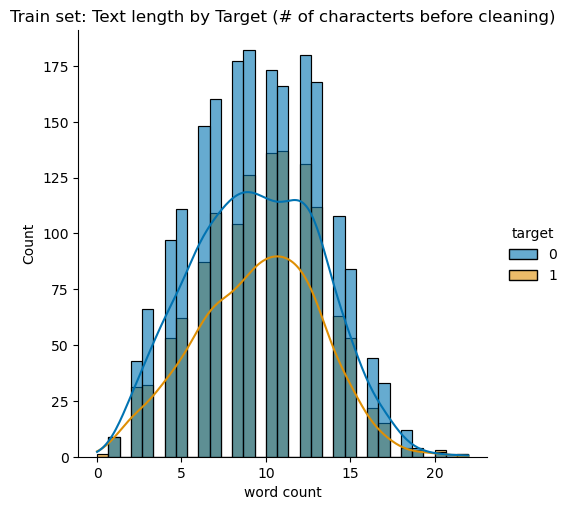

In [13]:
plotter(newdf1_train,'Word Count')

In [14]:
train_tweetz.head().style.background_gradient(cmap='coolwarm')

,id,keyword,location,text,target
0,1,nan,nan,Deeds Reason earthquake May ALLAH Forgive us,1
1,4,nan,nan,Forest fire near La Ronge Sask Canada,1
2,5,nan,nan,residents asked shelter place notified officers evacuation shelter place orders expected,1
3,6,nan,nan,13000 people receive wildfires evacuation orders California,1
4,7,nan,nan,got sent photo Ruby Alaska smoke wildfires pours school,1


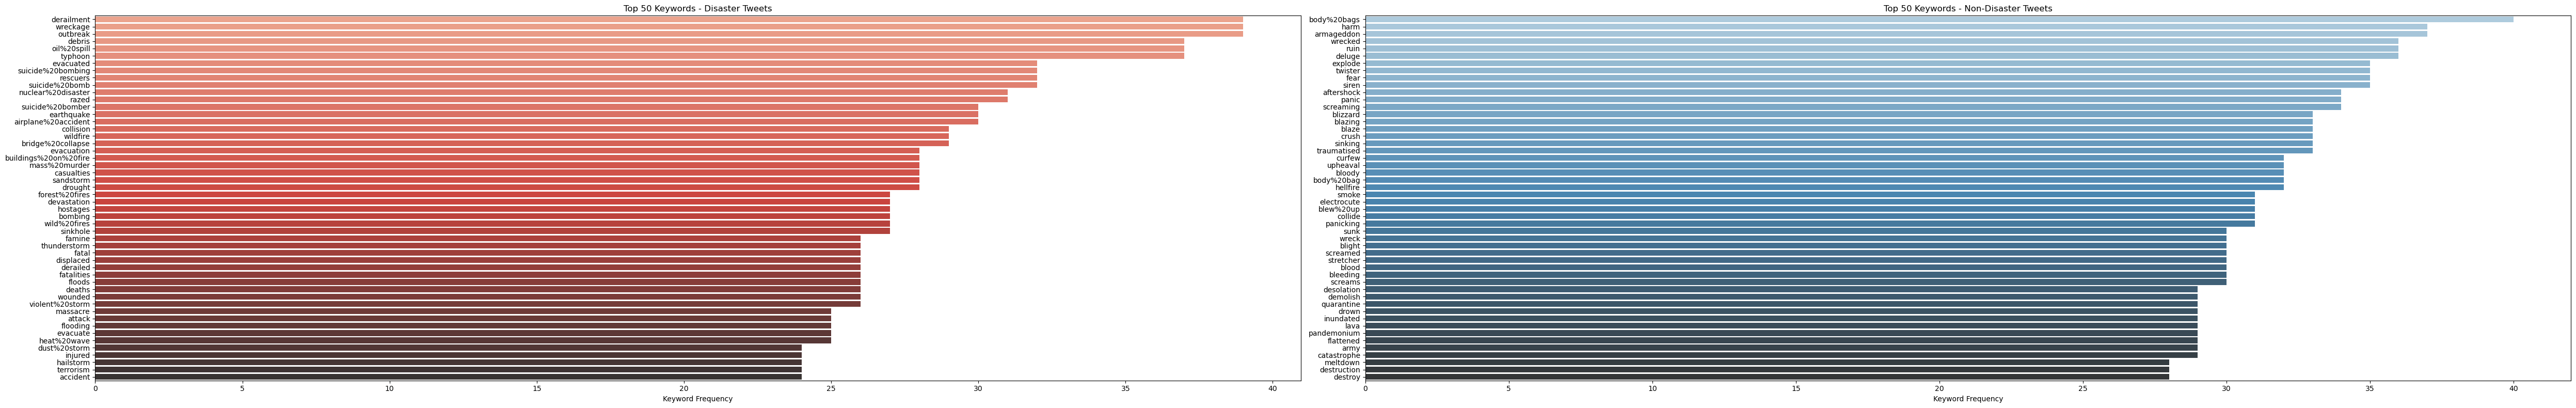

In [15]:
ploty(disaster,nondisaster)

# Convert text to sequences using tokenizer


In [16]:
max_features=3000

In [17]:
# using tokenizer to convert the text into tokens
tokenizer=Tokenizer(num_words=max_features,split=' ')
tokenizer.fit_on_texts(train_tweetz['text'].values)
train_data_padded = tokenizer.texts_to_sequences(train_tweetz['text'].values)
train_data_padded = pad_sequences(train_data_padded)


In [18]:
train_data_padded.shape

(7613, 20)

In [19]:
train_labels = train_tweetz['target']

Splitting the data for our train and test purpose

In [20]:
X_train, X_test, y_train, y_test = train_test_split(train_data_padded, train_labels, test_size=0.2, random_state=42)

In [21]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(6090, 20) (1523, 20) (6090,) (1523,)


# Training the Model 

Deep learning can be considered as a subset of machine learning. It is a field that is based on learning and improving on its own by examining computer algorithms. While machine learning uses simpler concepts, deep learning works with artificial neural networks, which are designed to imitate how humans think and learn. Until recently, neural networks were limited by computing power and thus were limited in complexity.
It can be used to solve any pattern recognition problem and without human intervention.


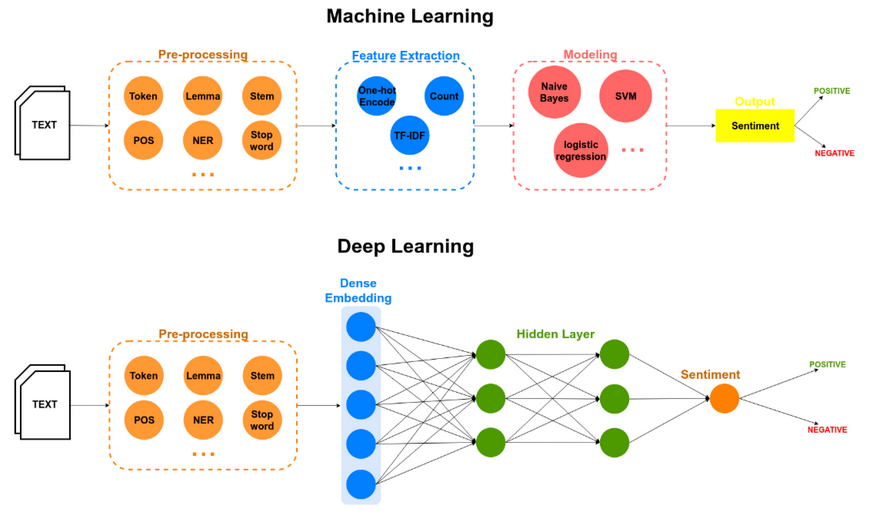



Brief Explaination of LTSM and GRU:


LSTM (Long Short-Term Memory) and GRU (Gated Recurrent Unit) are two types of recurrent neural network (RNN) architectures that are commonly used for sequential data processing tasks, such as natural language processing (NLP) and time series analysis. They are designed to address the limitations of traditional RNNs, which struggle with capturing long-term dependencies in sequential data.

LSTM:

    LSTM is a type of RNN architecture that introduces memory cells to store and retrieve information over long sequences.
    It consists of three main components: the input gate, the forget gate, and the output gate.
    The input gate determines which information from the input should be stored in the memory cell.
    The forget gate decides which information should be discarded from the memory cell.
    The output gate controls the flow of information from the memory cell to the output of the LSTM unit.
    The memory cell allows the LSTM to capture and retain long-term dependencies by selectively updating and forgetting information.

GRU:

    GRU is another type of RNN architecture that is similar to LSTM but has a simpler structure with two gates: the update gate and the reset gate.
    The update gate determines the amount of old information to retain and the amount of new information to incorporate.
    The reset gate controls how much of the past information should be forgotten and allows the model to focus on more recent inputs.
    GRU combines the memory cell and hidden state of LSTM into a single vector called the "hidden state," making it more computationally efficient.

Both LSTM and GRU have been successful in various NLP tasks, including text classification, sentiment analysis, machine translation, and language generation. They excel in capturing long-range dependencies in sequences, making them effective in scenarios where understanding the context and semantic relationships between elements is crucial.




# **Dense Neural Network:**

In [22]:
# Dense Neural Network model
embed_dim = 32
model_dense = Sequential()
model_dense.add(Embedding(max_features, embed_dim,input_length = train_data_padded.shape[1]))
model_dense.add(Dense(32, activation='relu'))
model_dense.add(Dense(1, activation='sigmoid'))
model_dense.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dense.fit(X_train, y_train, epochs = 10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
191/191 [==============================] - 3s 6ms/step - loss: 0.6710 - accuracy: 0.6068 - val_loss: 0.6474 - val_accuracy: 0.6323
Epoch 2/10
191/191 [==============================] - 1s 4ms/step - loss: 0.6362 - accuracy: 0.6365 - val_loss: 0.6405 - val_accuracy: 0.6342
Epoch 3/10
191/191 [==============================] - 1s 5ms/step - loss: 0.6276 - accuracy: 0.6385 - val_loss: 0.6414 - val_accuracy: 0.6345
Epoch 4/10
191/191 [==============================] - 1s 5ms/step - loss: 0.6250 - accuracy: 0.6394 - val_loss: 0.6417 - val_accuracy: 0.6346
Epoch 5/10
191/191 [==============================] - 1s 5ms/step - loss: 0.6233 - accuracy: 0.6405 - val_loss: 0.6423 - val_accuracy: 0.6340
Epoch 6/10
191/191 [==============================] - 1s 4ms/step - loss: 0.6224 - accuracy: 0.6406 - val_loss: 0.6433 - val_accuracy: 0.6348
Epoch 7/10
191/191 [==============================] - 1s 4ms/step - loss: 0.6215 - accuracy: 0.6410 - val_loss: 0.6443 - val_accuracy: 0.6346
Epoch 

In [23]:
y_pred = model_dense.predict(X_test)

48/48 [==============================] - 0s 2ms/step


In [24]:
y_pred=np.round(y_pred)

In [25]:
y_train_binary = np.where(y_train == 1, 1, 0)

In [27]:


accuracy = model_dense.evaluate(X_test, y_test)[1]
print(f"Accuracy: {accuracy}")

48/48 [==============================] - 0s 2ms/step - loss: 0.6461 - accuracy: 0.6351
Accuracy: 0.6350952386856079


# LTSM

In [32]:
lstm_out = 32
model = Sequential()
max_features=3000
embed_dim = 32
model.add(Embedding(max_features, embed_dim,input_length = train_data_padded.shape[1]))
model.add(Dropout(0.2))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.4))
model.add(Dense(1,activation='sigmoid'))
adam = optimizers.Adam(learning_rate=0.002)
model.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 32)            96000     
                                                                 
 dropout (Dropout)           (None, 20, 32)            0         
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 104,353
Trainable params: 104,353
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
model.fit(X_train, y_train, epochs = 10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
191/191 [==============================] - 9s 28ms/step - loss: 0.5379 - accuracy: 0.7227 - val_loss: 0.4430 - val_accuracy: 0.7997
Epoch 2/10
191/191 [==============================] - 5s 26ms/step - loss: 0.3673 - accuracy: 0.8448 - val_loss: 0.4609 - val_accuracy: 0.7951
Epoch 3/10
191/191 [==============================] - 5s 26ms/step - loss: 0.3190 - accuracy: 0.8696 - val_loss: 0.4995 - val_accuracy: 0.7787
Epoch 4/10
191/191 [==============================] - 5s 26ms/step - loss: 0.2848 - accuracy: 0.8849 - val_loss: 0.5288 - val_accuracy: 0.7748
Epoch 5/10
191/191 [==============================] - 5s 25ms/step - loss: 0.2645 - accuracy: 0.8923 - val_loss: 0.5527 - val_accuracy: 0.7656
Epoch 6/10
191/191 [==============================] - 5s 26ms/step - loss: 0.2400 - accuracy: 0.9051 - val_loss: 0.6390 - val_accuracy: 0.7597
Epoch 7/10
191/191 [==============================] - 5s 25ms/step - loss: 0.2164 - accuracy: 0.9103 - val_loss: 0.6555 - val_accuracy: 0.7557

In [34]:
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Accuracy: {accuracy}")

48/48 [==============================] - 0s 5ms/step - loss: 0.8736 - accuracy: 0.7511
Accuracy: 0.75114905834198


In [35]:
y_pred = model.predict(X_test)

48/48 [==============================] - 1s 5ms/step


In [36]:
y_pred=np.round(y_pred)

In [ ]:
y_pred.shape

In [37]:

train_accuracy = round(metrics.accuracy_score(y_train,model.predict(X_train).round())*100)
train_accuracy

191/191 [==============================] - 1s 5ms/step


96

In [ ]:
test_labels = np.array(train_tweetz['target'][:1523])

In [ ]:
cm_dense = confusion_matrix(test_labels, y_train)
sns.heatmap(cm_dense, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Dense Neural Network')
plt.show()

# **GRU**

In [28]:
# GRU model
model_gru = Sequential()
model_gru.add((Embedding(max_features, embed_dim,input_length = train_data_padded.shape[1])))
model_gru.add(GRU(32, return_sequences=True))
model_gru.add(GRU(32))
model_gru.add(Dense(1, activation='sigmoid'))
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_gru.fit(X_train, y_train, epochs = 10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
191/191 [==============================] - 11s 33ms/step - loss: 0.5513 - accuracy: 0.7110 - val_loss: 0.4608 - val_accuracy: 0.7899
Epoch 2/10
191/191 [==============================] - 6s 29ms/step - loss: 0.3666 - accuracy: 0.8415 - val_loss: 0.4681 - val_accuracy: 0.7892
Epoch 3/10
191/191 [==============================] - 5s 28ms/step - loss: 0.3086 - accuracy: 0.8686 - val_loss: 0.5091 - val_accuracy: 0.7728
Epoch 4/10
191/191 [==============================] - 6s 29ms/step - loss: 0.2671 - accuracy: 0.8893 - val_loss: 0.5859 - val_accuracy: 0.7459
Epoch 5/10
191/191 [==============================] - 6s 30ms/step - loss: 0.2245 - accuracy: 0.9102 - val_loss: 0.6373 - val_accuracy: 0.7511
Epoch 6/10
191/191 [==============================] - 6s 29ms/step - loss: 0.1746 - accuracy: 0.9351 - val_loss: 0.7992 - val_accuracy: 0.7315
Epoch 7/10
191/191 [==============================] - 6s 29ms/step - loss: 0.1498 - accuracy: 0.9447 - val_loss: 0.8349 - val_accuracy: 0.734

In [29]:
accuracy = model_gru.evaluate(X_test, y_test)[1]
print(f"Accuracy: {accuracy}")

48/48 [==============================] - 0s 7ms/step - loss: 1.1307 - accuracy: 0.7288
Accuracy: 0.7288246750831604


In [30]:
train_accuracy = round(metrics.accuracy_score(y_train,model_gru.predict(X_train).round())*100)
train_accuracy

191/191 [==============================] - 2s 7ms/step


97

In [38]:
l =50
test_token = tokenizer.texts_to_sequences(test_tweetz['text'].values)
test_token = pad_sequences(test_token, maxlen =l)

In [39]:
y_hat = model_gru.predict(test_token).round()
submission = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")
submission['target'] = np.round(y_hat).astype('int')
submission.to_csv('submission.csv', index=False)
submission.describe().style.background_gradient(cmap='coolwarm')

102/102 [==============================] - 3s 14ms/step


,id,target
count,3263.000000,3263.000000
mean,5427.152927,0.407294
std,3146.427221,0.491406
min,0.000000,0.000000
25%,2683.000000,0.000000
50%,5500.000000,0.000000
75%,8176.000000,1.000000
max,10875.000000,1.000000


# HyperParameter Tuning 

In [40]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import GRU

# Function to create the GRU model
def create_model(gru_units=128, dropout_rate=0.2):
    model = Sequential()
    model.add((Embedding(max_features, embed_dim,input_length = train_data_padded.shape[1])))
    model.add(GRU(units=gru_units, dropout=dropout_rate))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create a KerasClassifier with the GRU model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

# Define the hyperparameters to tune
param_grid = {
    'gru_units': [64, 128],
    'dropout_rate': [0.2, 0.4]
}

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters: ", grid_result.best_params_)
print("Best Accuracy: ", grid_result.best_score_)

Best Hyperparameters:  {'dropout_rate': 0.4, 'gru_units': 64}
Best Accuracy:  0.747454841931661



Discussion

The final score is 0.764 from this submission.

The learning in this projects are as follows.

The thing that worked in this dataset and model:

    How to prepare the text.
    How to visualize the text, word count, etc.
    Passing the text to Dense layer,LTSm and GRU
    GRU RNN layers worked well instead of LSTM



The future feature that might help:

    Data augmentation to less data, disaster tweets.
    
    Try other preprocessing text before feeding them to embedding.

Summary

We get final score 0.764  for this competition. Our model is text binary classifier based on universal sentence encoder. 



# References

    This notebook's github repo: https://github.com/Akitsuyoshi/intro_dl_week4
    NLP intro guide in kaggle: https://www.kaggle.com/code/jhoward/getting-started-with-nlp-for-absolute-beginners
    Tutorial for transfer learning in Keras: https://amitness.com/2020/02/tensorflow-hub-for-transfer-learning/
    Official docs of universal-sentence-encoder: https://tfhub.dev/google/universal-sentence-encoder/4
    RNN model's implementation example for NLP: https://www.kaggle.com/code/abhishek/approaching-almost-any-nlp-problem-on-kaggle/notebook
    Preprocess concept when using transfer learning as embedding layer: https://www.kaggle.com/code/christofhenkel/how-to-preprocessing-when-using-embeddings/notebook
    Tokenizer for sentence encoder: https://github.com/tensorflow/hub/issues/662
    CNN for image task: https://www.kaggle.com/code/akitsuyoshi/cnn-using-transfer-learning-in-keras

